In [6]:
#1) FIND-S Algorithm on Training dataset

import pandas as pd
# Load data
file_name = '/Users/Joanna letica Pinto/OneDrive/Desktop/ML/EnjoySport.csv'  # Corrected the variable name and added missing quotes
data = pd.read_csv(file_name)

# Initialize the hypothesis
hypothesis = ['%' for _ in range(len(data.columns) - 1)]  # Corrected the syntax

# Filter positive examples (where EnjoySport is 'Yes')
positive_examples = data[data['EnjoySport'] == 'Yes'].iloc[:, :-1].values.tolist()  # Corrected the syntax and logic

# Apply the FIND-S algorithm
for example in positive_examples: 
    for i in range(len(example)):
        if hypothesis[i] != '%' and hypothesis[i] != example[i]:
            hypothesis[i] = '?'
        else:
            hypothesis[i] = example[i]  # Corrected the syntax

# Print the maximally specific hypothesis
print("The maximally specific Find-S hypothesis for the given training examples is:")
print(hypothesis)


The maximally specific Find-S hypothesis for the given training examples is:
['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [7]:
#5)Develop a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file.
#Compute the accuracy of the classifier, considering few test data sets.

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load the training dataset
train_data = pd.read_csv('/Users/Joanna letica Pinto/OneDrive/Desktop/ML/PlayTennis.csv')
# Load the testing dataset
test_data = pd.read_csv('/Users/Joanna letica Pinto/OneDrive/Desktop/ML/Test.csv')

# Mapping categorical variables to numerical values for both datasets
train_data['Outlook'] = train_data['Outlook'].map({'Sunny': 0, 'Overcast': 1, 'Rain': 2})
train_data['Temperature'] = train_data['Temperature'].map({'Hot': 0, 'Mild': 1, 'Cool': 2})
train_data['Humidity'] = train_data['Humidity'].map({'High': 0, 'Normal': 1})
train_data['Wind'] = train_data['Wind'].map({'Weak': 0, 'Strong': 1})
train_data['PlayTennis'] = train_data['PlayTennis'].map({'No': 0, 'Yes': 1})

test_data['Outlook'] = test_data['Outlook'].map({'Sunny': 0, 'Overcast': 1, 'Rain': 2})
test_data['Temperature'] = test_data['Temperature'].map({'Hot': 0, 'Mild': 1, 'Cool': 2})
test_data['Humidity'] = test_data['Humidity'].map({'High': 0, 'Normal': 1})
test_data['Wind'] = test_data['Wind'].map({'Weak': 0, 'Strong': 1})
test_data['PlayTennis'] = test_data['PlayTennis'].map({'No': 0, 'Yes': 1})

# Separate features and target variable for both datasets
X_train = train_data.drop('PlayTennis', axis=1)
y_train = train_data['PlayTennis']
X_test = test_data.drop('PlayTennis', axis=1)
y_test = test_data['PlayTennis']

# Uncomment the following line to print out the actual labels of the test data
# print(y_test)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict the target variable
y_pred = nb_classifier.predict(X_test)

# Print predicted output
print("Predicted Output:")
for i, prediction in enumerate(y_pred):
    print(f"Sample {i + 1}: {'Yes' if prediction == 1 else 'No'}")

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Predicted Output:
Sample 1: No
Sample 2: No
Sample 3: No
Sample 4: Yes
Sample 5: Yes
Sample 6: Yes
Sample 7: Yes
Sample 8: No
Sample 9: Yes
Sample 10: Yes
Sample 11: Yes
Sample 12: No
Sample 13: Yes
Sample 14: No
Accuracy: 0.7857142857142857


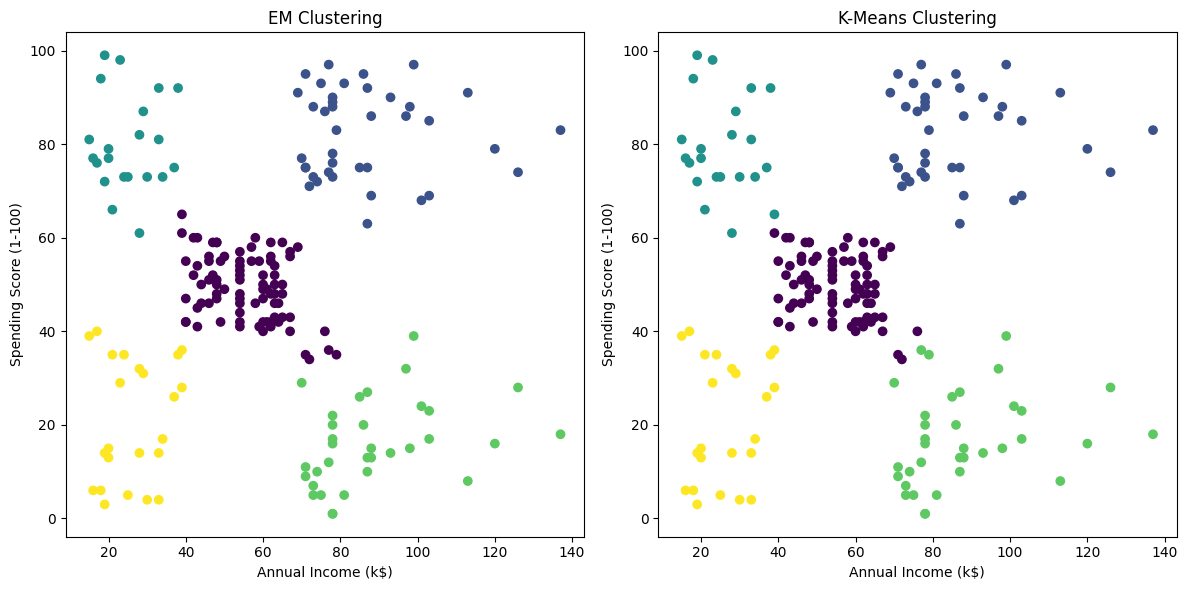

In [8]:
#6)Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering 
#using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering.
#You can add Java/Python ML library classes/API in the program.

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/Joanna letica Pinto/OneDrive/Desktop/ML/Mall_Customers.csv')

# Selecting features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply EM algorithm
em_model = GaussianMixture(n_components=5, random_state=42)
em_clusters = em_model.fit_predict(scaled_data)

# Apply k-means algorithm
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans_model.fit_predict(scaled_data)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=em_clusters, cmap='viridis')
plt.title('EM Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


In [3]:
#7)Implement and demonstrate the working of k-Nearest Neighbour Algorithm and apply it to classify the iris data set.

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

# Load Iris dataset
iris = load_iris()

# Column names  
column_names = iris.feature_names
print("Column names in the Iris dataset:")
print(column_names)

# Target names
target_names = iris.target_names
print("\nTarget names in the Iris dataset:")
print(target_names)

# Create a DataFrame
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
print(iris_df.head())

iris_df['target'] = iris['target']

# Split the dataset into features and target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the k-Nearest Neighbor classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of k-Nearest Neighbor (k={k}): {accuracy}")

# Display actual and predicted outputs
actual_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(actual_predicted_df)

# Demo: Classify a sample
sample = np.array([[5.1, 3.5, 1.4, 0.2]]) # Example sample
predicted_class = knn.predict(sample)[0] # Extract scalar value
predicted_species = iris.target_names[predicted_class]
print(f"Predicted class for the sample: {predicted_species}")

# Suppress the feature names warning
warnings.filterwarnings("ignore", message="""X does not have valid feature names""")

Column names in the Iris dataset:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names in the Iris dataset:
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Accuracy of k-Nearest Neighbor (k=3): 1.0
     Actual  Predicted
73        1          1
18        0          0
118       2          2
78        1          1
76        1          1
31        0          0
64        1          1
141       2          2
68        1          1
82        1          1
110       2          2
12        0          0
36        0    

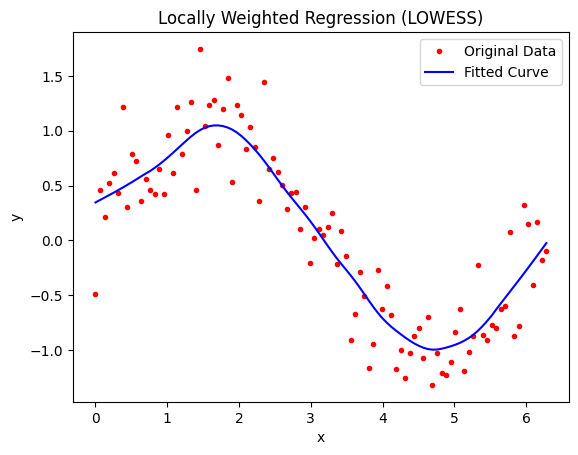

In [10]:
#8)Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. 
#Select appropriate data set for your experiment and draw graphs.

from math import ceil
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]
        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2
    return yest

# Generate sample data
n = 100
x = np.linspace(0, 2 * np.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f = 0.25
iterations = 3

# Apply LOWESS algorithm
yest = lowess(x, y, f, iterations)

# Plot original data and fitted curve
plt.plot(x, y, "r.", label="Original Data")
plt.plot(x, yest, "b-", label="Fitted Curve")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Locally Weighted Regression (LOWESS)")
plt.show()

In [10]:
#2
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv("/Users/Joanna letica Pinto/OneDrive/Desktop/ML/EnjoySport.csv"))
print(data)
concepts = np.array(data.iloc[:,:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    print("\n Intialization of specific_h and general_h")
    specific_h = concepts[0].copy()
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i,h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print("\nSteps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    indices = [i for i, val in enumerate(general_h) if val == ['?','?','?','?',"?","?"]]
    for i in indices:
        general_h.remove(['?','?','?','?','?','?'])
    return specific_h,general_h
s_final,g_final = learn(concepts,target)
print("\nFinal Specific_h:",s_final,sep="\n")
print("\nFinal General_h:",g_final,sep="\n")

     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']

 Intialization of specific_h and general_h
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], 

In [8]:
#4
import numpy as np
# X = (hours
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array (([92], [86], [89]), dtype=float)
X = X/np.amax (X, axis=0)
# maximum of X array
y = y/100
# max test score is 100
class Neural_Network(object):
    def __init__(self):
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        self.W1 = np.random.randn(self.inputSize,self.hiddenSize)
        self.W2 = np.random.randn(self.hiddenSize,self.outputSize)
    def forward (self, X):
        self.z = np.dot(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o
    def sigmoid(self, s): 
        return 1/(1+np.exp(-s))
    def sigmoidPrime (self, s):
        return s * (1-s)
    def backward(self, X, y, o):
        self.o_error = y-o
        self.o_delta = self.o_error*self.sigmoidPrime(o)
        self.z2_error = self.o_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2)
        self.W1 += X.T.dot(self.z2_delta)
    def train(self, X, y):
        o = self.forward(X)
        self.backward(X,y,o)
NN = Neural_Network()
for i in range(1000):
    print("\nInput: \n"+str(X))
    print("\nActual Output: \n"+str(y))
    print("\nPredicted Output: \n"+str(NN.forward(X)))
    print("\nLoss: \n"+str(np.mean(np.square(y-NN.forward(X)))))   
    NN.train(X, y)         


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.32846069]
 [0.35286105]
 [0.2784515 ]]

Loss: 
0.3270334108992312

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.38990361]
 [0.38925739]
 [0.33609752]]

Loss: 
0.2698029145848991

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.45056326]
 [0.42534066]
 [0.39593421]]

Loss: 
0.21780019874798962

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.50548801]
 [0.45881395]
 [0.45235926]]

Loss: 
0.1747666201074415

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Pre

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

data = pd.read_csv('/Users/Joanna letica Pinto/OneDrive/Desktop/ML/PlayTennis.csv')

# 2. Separate features and target variable
features = data.drop('PlayTennis', axis=1)  # Features
target_column = data['PlayTennis']  # Target variable

# 3. Convert textual data into numerical data
encoder = LabelEncoder()
for col in features.columns:
    features[col] = encoder.fit_transform(features[col])
target_column = encoder.fit_transform(target_column)

# 4. Create and train the decision tree model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(features,target_column)

# 5. Visualize the tree
visualization = export_text(clf,feature_names=list(features),class_names=['No','Yes'])
print(visualization)

# 6. Predicting own values, if in case maam asks
print(clf.predict(features))

|--- Outlook <= 0.50
|   |--- class: Yes
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- Outlook >  1.50
|   |   |   |--- class: No
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: No
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: Yes
|   |   |--- Wind >  0.50
|   |   |   |--- class: Yes

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
